In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LinearRegression
from pandas import Grouper
from pandas import DataFrame
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.formula.api as smf 


In [2]:
airlines = pd.read_csv('Airlines+Data.csv')

In [3]:
airlines.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [4]:
airlines.tail()

,Month,Passengers
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271
95,Dec-02,306


In [5]:
airlines.shape

(96, 2)

In [6]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


## plotting the data

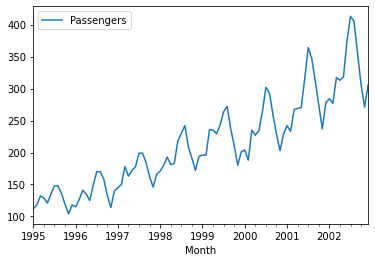

In [11]:
airlines_1 = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
airlines_1.plot()
plt.show()

In [12]:
airlines_1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [13]:
airlines_1.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [14]:
airlines_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


#### Histogram and Density Plots

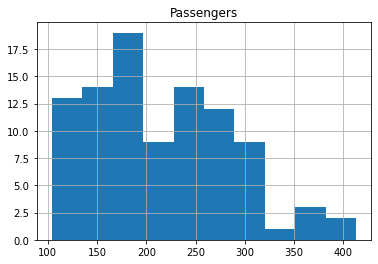

In [15]:
airlines_1.hist()
plt.show()

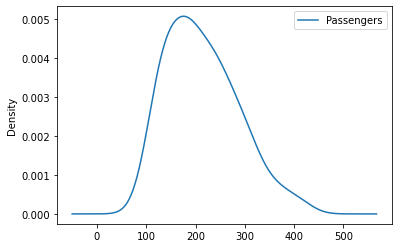

In [16]:
airlines_1.plot(kind='kde')
plt.show()

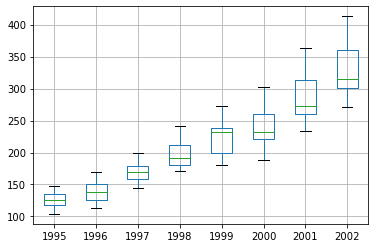

In [17]:
groups = airlines_1.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = list(group.values.flatten())
years.boxplot()
plt.show()


In [18]:
len(airlines_1)

96

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

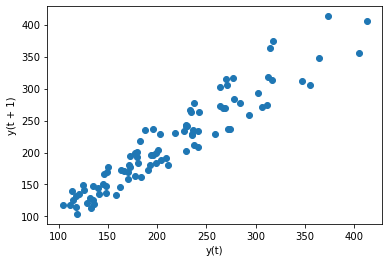

In [19]:
lag_plot(airlines_1,lag=1)

## the data is positive correlated 

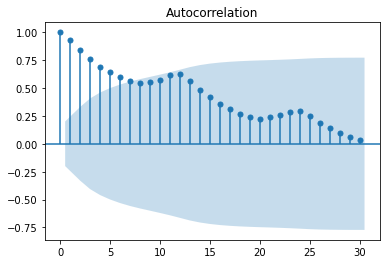

In [20]:
plot_acf(airlines_1,lags=30)
plt.show()

### forecasting driven models

In [21]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
n=airlines['Month'][0]
n[0:3]

'Jan'

In [22]:
airlines['months']=0
airlines['months']

0     0
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Name: months, Length: 96, dtype: int64

In [23]:
for i in range(96):
 n=airlines['Month'][i]
 airlines['months'][i]=n[0:3]
airlines['months']

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/1347349959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['months'][i]=n[0:3]
C:\Users\shara\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0     Jan
1     Feb
2     Mar
3     Apr
4     May
     ... 
91    Aug
92    Sep
93    Oct
94    Nov
95    Dec
Name: months, Length: 96, dtype: object

In [24]:
dummy = pd.DataFrame(pd.get_dummies(airlines['months']))
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
print(dummy.columns)


Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')


In [26]:
air=pd.concat((airlines,dummy),axis=1)
t= np.arange(1,97)
air['t']=t
air['t_square']=air['t']*air['t']
air


,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025


In [27]:
log_Passengers=np.log(air['Passengers'])
air['log_Passengers']=log_Passengers
air


,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [28]:
train= air.head(90)
test=air.tail(6)


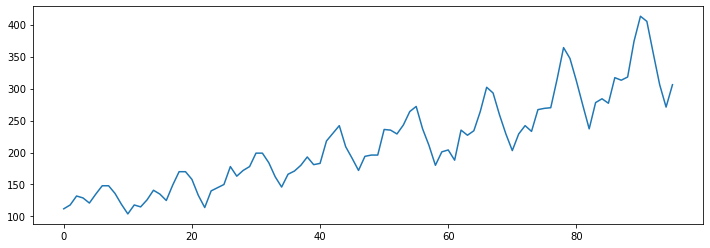

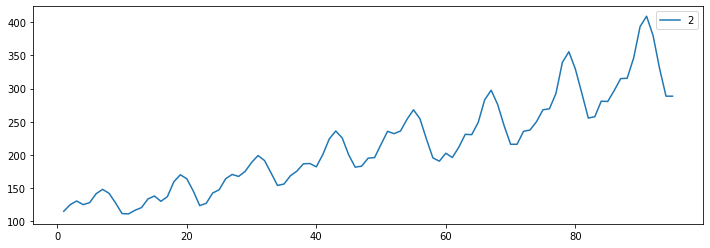

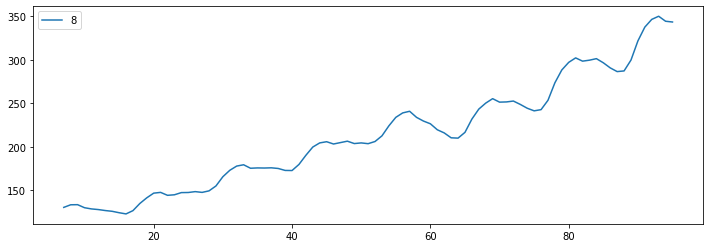

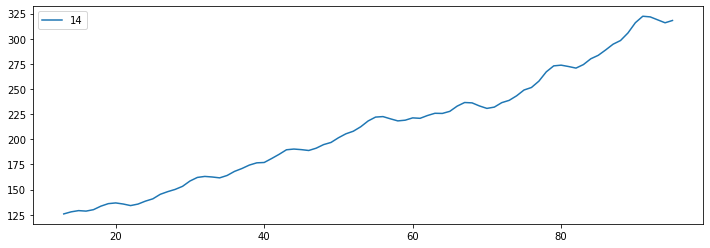

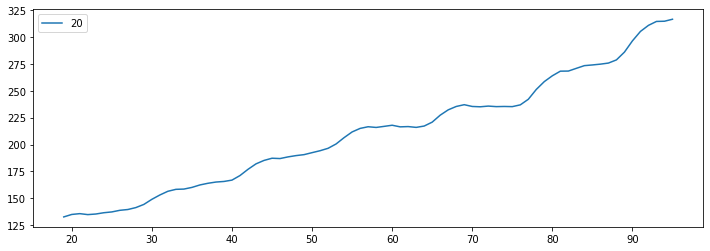

In [29]:
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    plt.figure(figsize=(12,4))
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')
    plt.show()


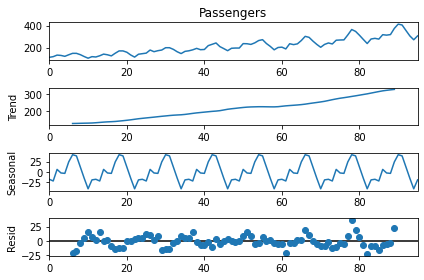

In [30]:
decompose_ts = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts.plot()
plt.show()

# ACF plots and PACF plots


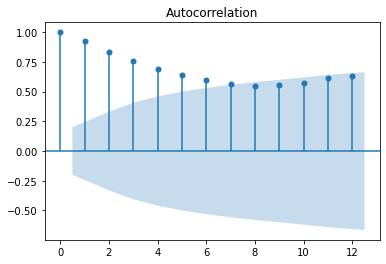

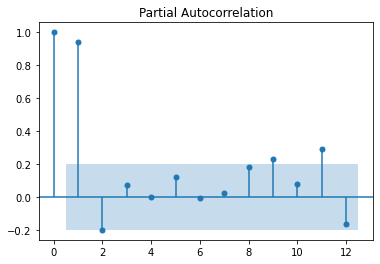

In [31]:
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()


In [32]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### simple exponential smoothing 

In [33]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers) 


C:\Users\shara\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.161170526223477

## in simple exponential the error rate is very high

In [34]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers) 

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/2379932437.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


27.619306276788603

+ with holt the accuracy is 27.61 cos the holt gives good accuracy on when the data is only 

In [35]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

2.361068485451511

+ while adding sesonal and trend the accuracy score is 2.361

In [36]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

1.6206932404690282

+ with ExponentialSmoothing when we seasonal got multiply and when i add trend the accuracy score is good 

In [37]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [38]:
hwe_model_add_add.forecast(10)

96     319.235216
97     311.528317
98     350.278607
99     346.984870
100    351.844900
101    403.925596
102    440.566696
103    427.446398
104    376.628083
105    329.767391
dtype: float64

## data smothing airlines 1 

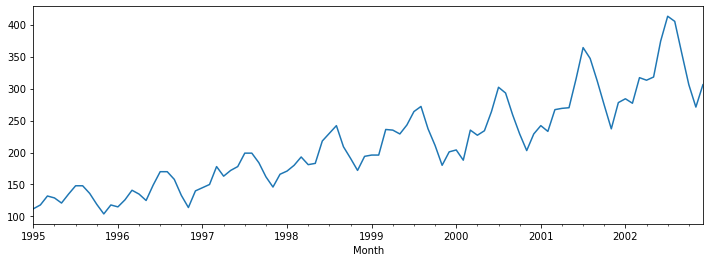

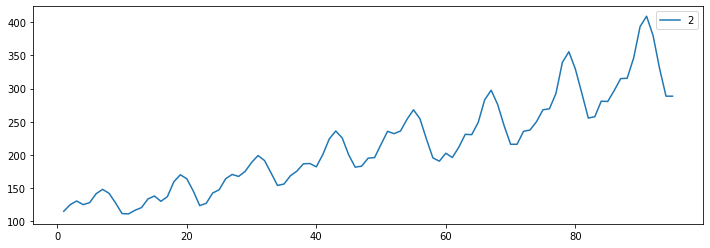

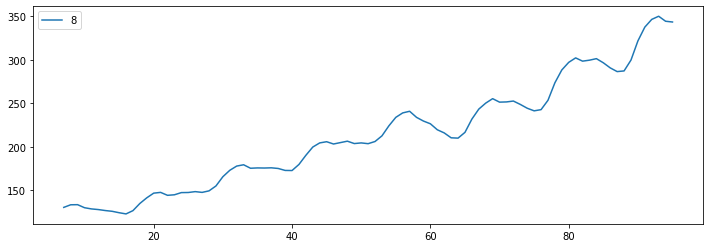

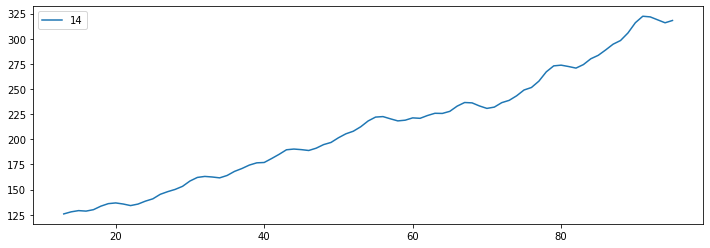

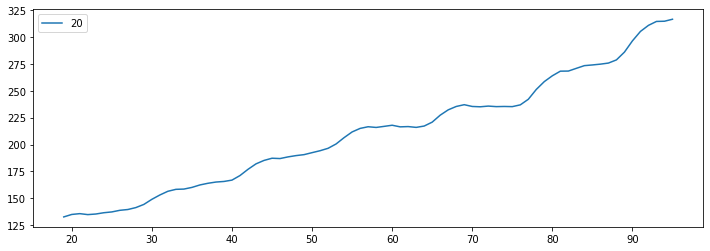

In [39]:
plt.figure(figsize=(12,4))
airlines_1.Passengers.plot(label="org")
for i in range(2,24,6):
    plt.figure(figsize=(12,4))
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')
    plt.show()


In [40]:
train_1= airlines_1.head(90)
test_1=airlines_1.tail(6)


## exponential smoothing 

In [41]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [42]:
ses_model = SimpleExpSmoothing(train_1["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_1.index[0],end = test_1.index[-1])
MAPE(pred_ses,test_1.Passengers) 


C:\Users\shara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shara\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\shara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


13.161170526223477

In [43]:
hwe_model_mul_add = ExponentialSmoothing(train_1["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test_1.index[0],end = test_1.index[-1])
MAPE(pred_hwe_mul_add,test_1.Passengers)

C:\Users\shara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1.6206932404690282

In [44]:
hwe_model_add_add_1 = ExponentialSmoothing(airlines_1["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\shara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [45]:
hwe_model_add_add_1.forecast(10)

2003-01-01    319.235216
2003-02-01    311.528317
2003-03-01    350.278607
2003-04-01    346.984870
2003-05-01    351.844900
2003-06-01    403.925596
2003-07-01    440.566696
2003-08-01    427.446398
2003-09-01    376.628083
2003-10-01    329.767391
Freq: MS, dtype: float64

In [46]:
X_1 = train_1.values
X_1 = X_1.astype('float32')
train_size = int(len(X_1) * 0.50)
train, test = X_1[0:train_size], X_1[train_size:]


In [47]:
history = [X_1 for X_1 in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>

## with arima the RMSE score is 26.642

In [48]:
coco_cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [49]:
coco_cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [50]:
coco_cola.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [51]:
coco_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [52]:
coco_cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [53]:
coco_cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<AxesSubplot:>

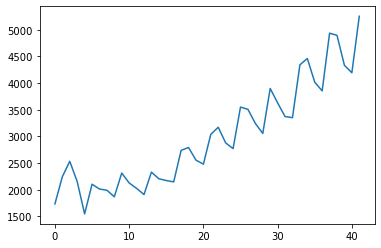

In [54]:
coco_cola.Sales.plot()

In [55]:
quarter=['Q1','Q2','Q3','Q4']
n=coco_cola['Quarter'][0]
n[0:2]

'Q1'

In [56]:
coco_cola['quarter']=0
coco_cola['quarter']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
Name: quarter, dtype: int64

In [57]:
for i in range(42):
 n=coco_cola['Quarter'][i]
 coco_cola['quarter'][i]=n[0:2]
coco_cola['quarter']

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/3022927767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco_cola['quarter'][i]=n[0:2]
C:\Users\shara\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0     Q1
1     Q2
2     Q3
3     Q4
4     Q1
5     Q2
6     Q3
7     Q4
8     Q1
9     Q2
10    Q3
11    Q4
12    Q1
13    Q2
14    Q3
15    Q4
16    Q1
17    Q2
18    Q3
19    Q4
20    Q1
21    Q2
22    Q3
23    Q4
24    Q1
25    Q2
26    Q3
27    Q4
28    Q1
29    Q2
30    Q3
31    Q4
32    Q1
33    Q2
34    Q3
35    Q4
36    Q1
37    Q2
38    Q3
39    Q4
40    Q1
41    Q2
Name: quarter, dtype: object

In [58]:
dummy=pd.DataFrame(pd.get_dummies(coco_cola['quarter']))
dummy


,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [59]:
coco_cola=pd.concat((coco_cola,dummy),axis=1)


In [60]:
Train_cc = coco_cola.head(30)
Test_cc = coco_cola.tail(11)

In [61]:
Train_cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [62]:
Test_cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
31,Q4_93,3373.0,Q4,0,0,0,1
32,Q1_94,3352.0,Q1,1,0,0,0
33,Q2_94,4342.0,Q2,0,1,0,0
34,Q3_94,4461.0,Q3,0,0,1,0
35,Q4_94,4017.0,Q4,0,0,0,1
36,Q1_95,3854.0,Q1,1,0,0,0
37,Q2_95,4936.0,Q2,0,1,0,0
38,Q3_95,4895.0,Q3,0,0,1,0
39,Q4_95,4333.0,Q4,0,0,0,1
40,Q1_96,4194.0,Q1,1,0,0,0


## moving average

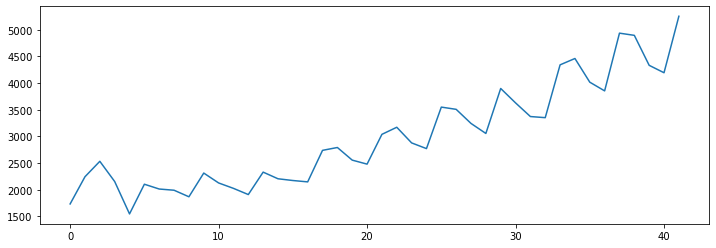

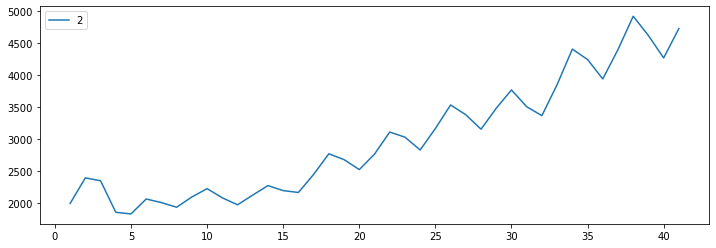

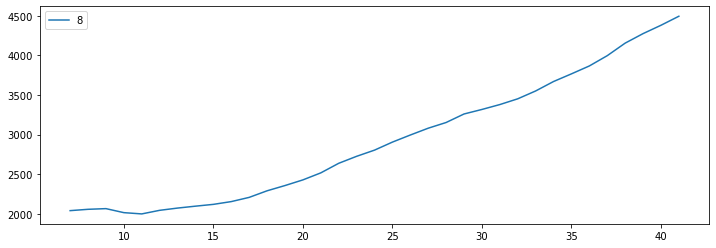

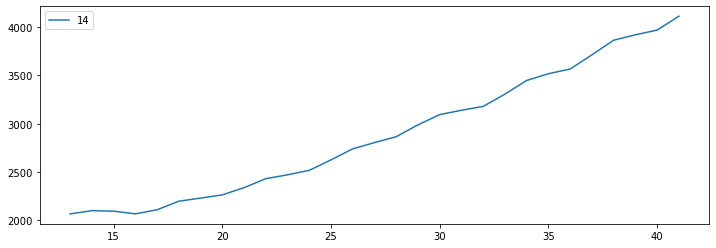

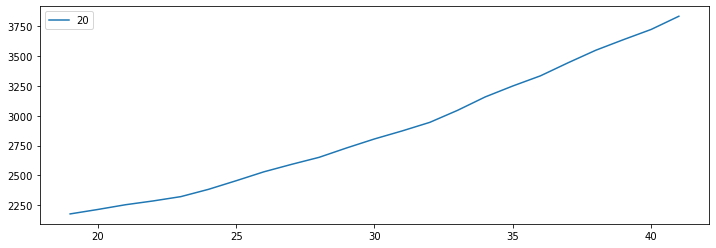

In [63]:
plt.figure(figsize=(12,4))
coco_cola.Sales.plot(label="org")
for i in range(2,24,6):
    plt.figure(figsize=(12,4))
    coco_cola["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')
    plt.show()


## time series decomposition plot

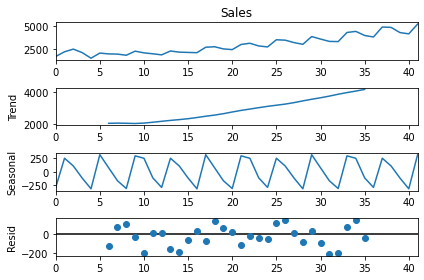

In [64]:
decompose_ts_add = seasonal_decompose(coco_cola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

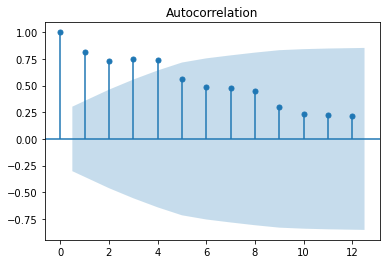

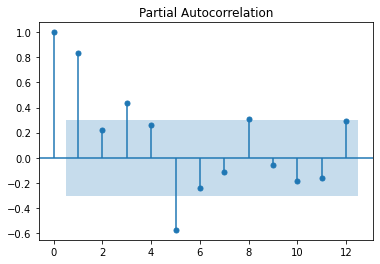

In [65]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coco_cola.Sales,lags=12)
tsa_plots.plot_pacf(coco_cola.Sales,lags=12)
plt.show()


In [66]:
ses_model = SimpleExpSmoothing(Train_cc["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test_cc.index[0],end = Test_cc.index[-1])
MAPE(pred_ses,Test_cc.Sales) 


C:\Users\shara\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


23.04137803380186

In [67]:
hw_model = Holt(Train_cc["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test_cc.index[0],end = Test_cc.index[-1])
MAPE(pred_hw,Test_cc.Sales) 

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/4013472036.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train_cc["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.603267425876039

In [68]:
hwe_model_add_add = ExponentialSmoothing(Train_cc["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test_cc.index[0],end = Test_cc.index[-1])
MAPE(pred_hwe_add_add,Test_cc.Sales) 

4.895836639048928

In [69]:
hwe_model_mul_add_cc = ExponentialSmoothing(Train_cc["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add_cc = hwe_model_mul_add.predict(start = Test_cc.index[0],end = Test_cc.index[-1])
MAPE(pred_hwe_mul_add,Test_cc.Sales)

C:\Users\shara\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4024: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


nan

In [70]:
hwe_model_add_add_cc = ExponentialSmoothing(coco_cola["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [71]:
hwe_model_add_add.forecast(10)

30    3783.656568
31    3662.641375
32    3619.694672
33    4177.970812
34    4197.771800
35    4004.509338
36    3946.323754
37    4565.025682
38    4591.085497
39    4445.289756
dtype: float64

In [72]:
coco_cola.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [73]:
t= np.arange(1,43)
coco_cola['t']=t
coco_cola['t_square']=coco_cola['t']*coco_cola['t']
coco_cola

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [74]:
log_Sales=np.log(coco_cola['Sales'])
coco_cola['log_Sales']=log_Sales
coco_cola

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [75]:
Train_cc.shape

(30, 7)

In [76]:
Train_cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [77]:
t= np.arange(1,31)
Train_cc['t']=t
Train_cc['t_square']=Train_cc['t']*Train_cc['t']
Train_cc

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/1488458353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_cc['t']=t
C:\Users\shara\AppData\Local\Temp/ipykernel_6176/1488458353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_cc['t_square']=Train_cc['t']*Train_cc['t']


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [78]:
Test_cc.shape

(11, 7)

In [79]:
t= np.arange(1,12)
Test_cc['t']=t
Test_cc['t_square']=Test_cc['t']*Test_cc['t']
Test_cc

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/814388460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_cc['t']=t
C:\Users\shara\AppData\Local\Temp/ipykernel_6176/814388460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_cc['t_square']=Test_cc['t']*Test_cc['t']


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
31,Q4_93,3373.0,Q4,0,0,0,1,1,1
32,Q1_94,3352.0,Q1,1,0,0,0,2,4
33,Q2_94,4342.0,Q2,0,1,0,0,3,9
34,Q3_94,4461.0,Q3,0,0,1,0,4,16
35,Q4_94,4017.0,Q4,0,0,0,1,5,25
36,Q1_95,3854.0,Q1,1,0,0,0,6,36
37,Q2_95,4936.0,Q2,0,1,0,0,7,49
38,Q3_95,4895.0,Q3,0,0,1,0,8,64
39,Q4_95,4333.0,Q4,0,0,0,1,9,81
40,Q1_96,4194.0,Q1,1,0,0,0,10,100


In [80]:
log_Sales=np.log(Train_cc['Sales'])
Train_cc['log_Sales']=log_Sales
Train_cc

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/1403817655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_cc['log_Sales']=log_Sales


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [81]:
log_Sales=np.log(Test_cc['Sales'])
Test_cc['log_Sales']=log_Sales
Test_cc

C:\Users\shara\AppData\Local\Temp/ipykernel_6176/261428735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_cc['log_Sales']=log_Sales


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
31,Q4_93,3373.0,Q4,0,0,0,1,1,1,8.123558
32,Q1_94,3352.0,Q1,1,0,0,0,2,4,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,3,9,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,4,16,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,5,25,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,6,36,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,7,49,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,8,64,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,9,81,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,10,100,8.341410


In [82]:
linear_model = smf.ols('Sales~t',data=Train_cc).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test_cc['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(pred_linear))**2))
rmse_linear

2347.025420945326

In [83]:
quad=smf.ols('Sales~t+t_square',data=Train_cc).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test_cc[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(predquad))**2))
rmsequad

2303.560847820215

In [84]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=Train_cc).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(Test_cc[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(predadd))**2))
rmseadd


1832.0923767068662

In [85]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train_cc).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(Test_cc[['t','Q1','Q2','Q3','Q4']])))
predaddlinear
rmseaddlinear=np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

2324.276315244973

In [86]:
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train_cc).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(Test_cc[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(predaddquad))**2))
rmseaddquad

2277.9626770477093

In [87]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=Train_cc).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test_cc[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1883.484946244226

In [88]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train_cc).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(Test_cc[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

2305.452030487806

In [89]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train_cc).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test_cc[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test_cc['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad


2280.6936962027285